In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

In [76]:
df = pd.read_csv('../data/manufacturing.csv')

df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB
None
       Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
count       3957.000000     3957.000000             3957.000000   
mean         200.034704       14.815558             2955.321308   
std           58.135717        5.772040             1458.224940   
min          100.014490        5.003008              513.706875   
25%          150.871296 

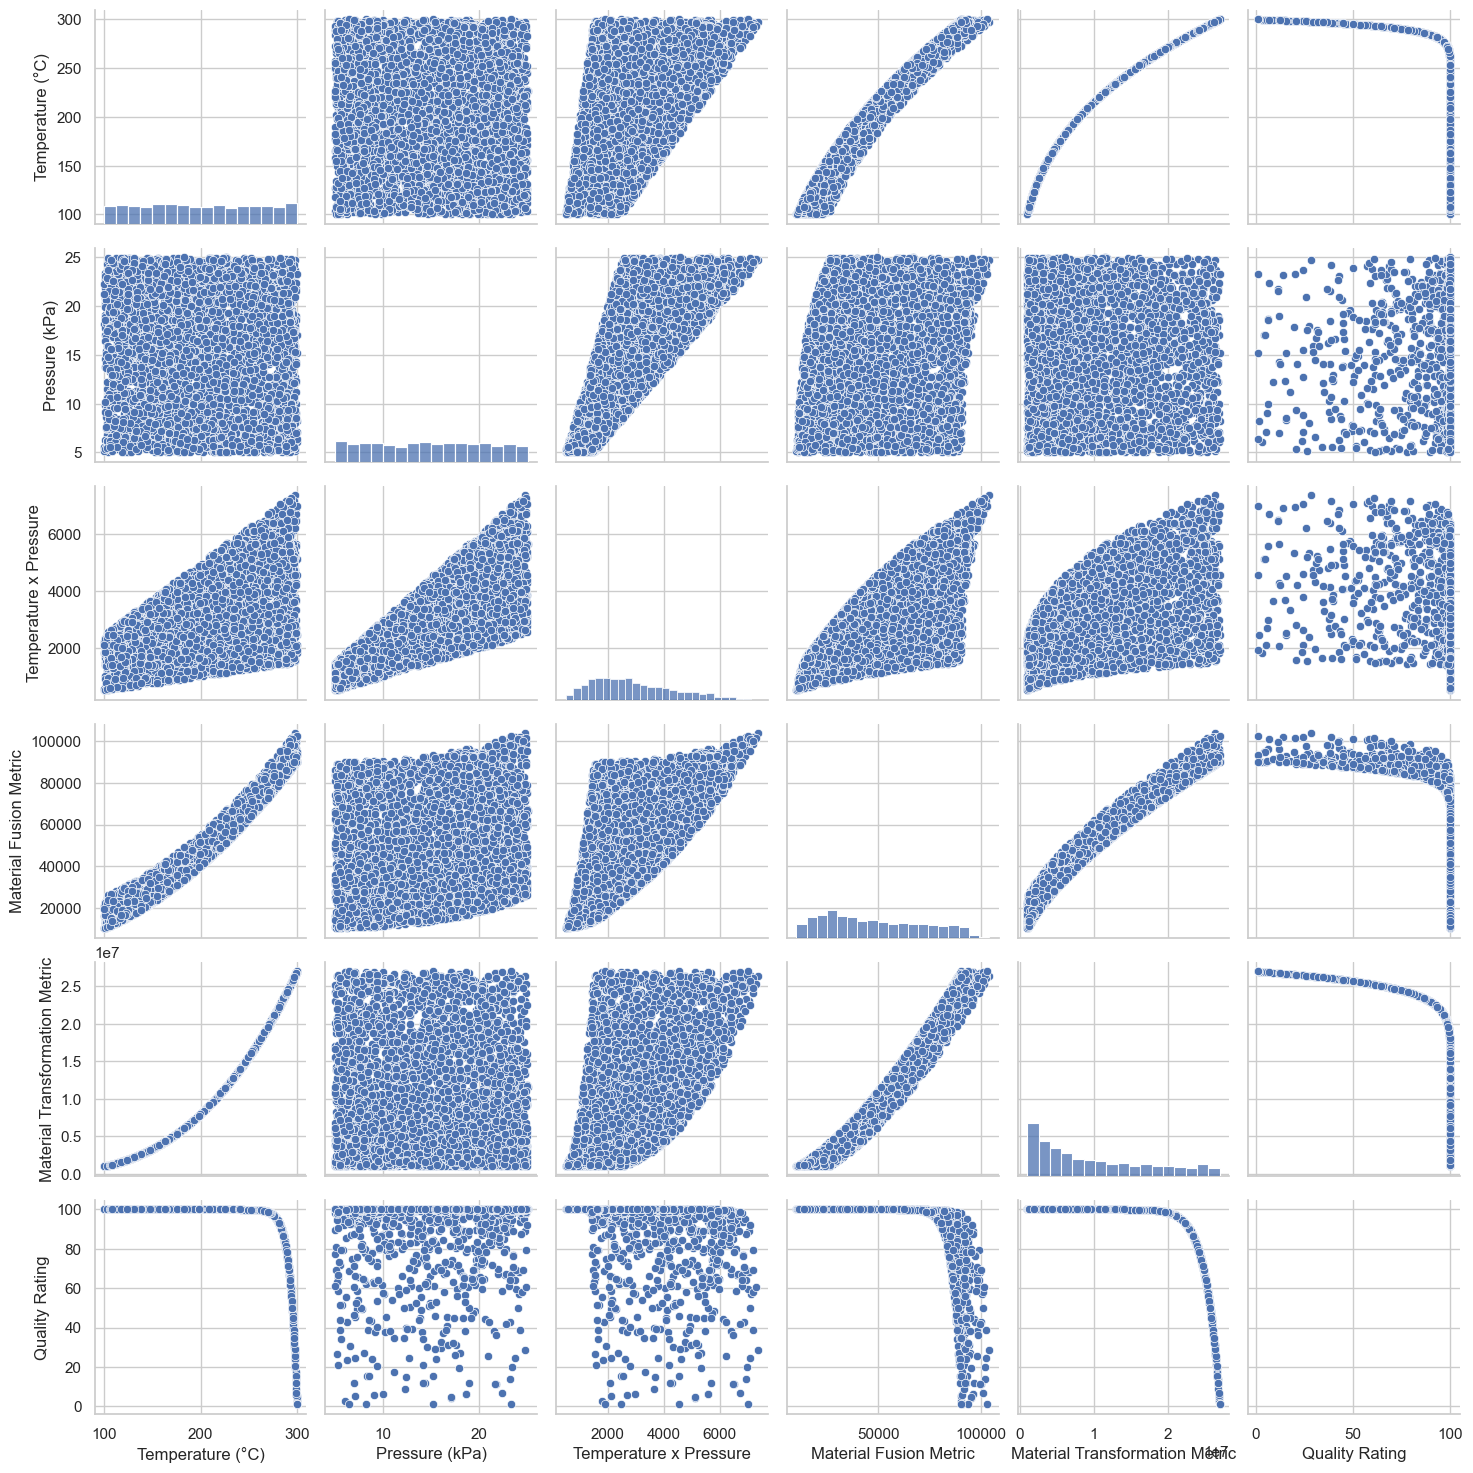

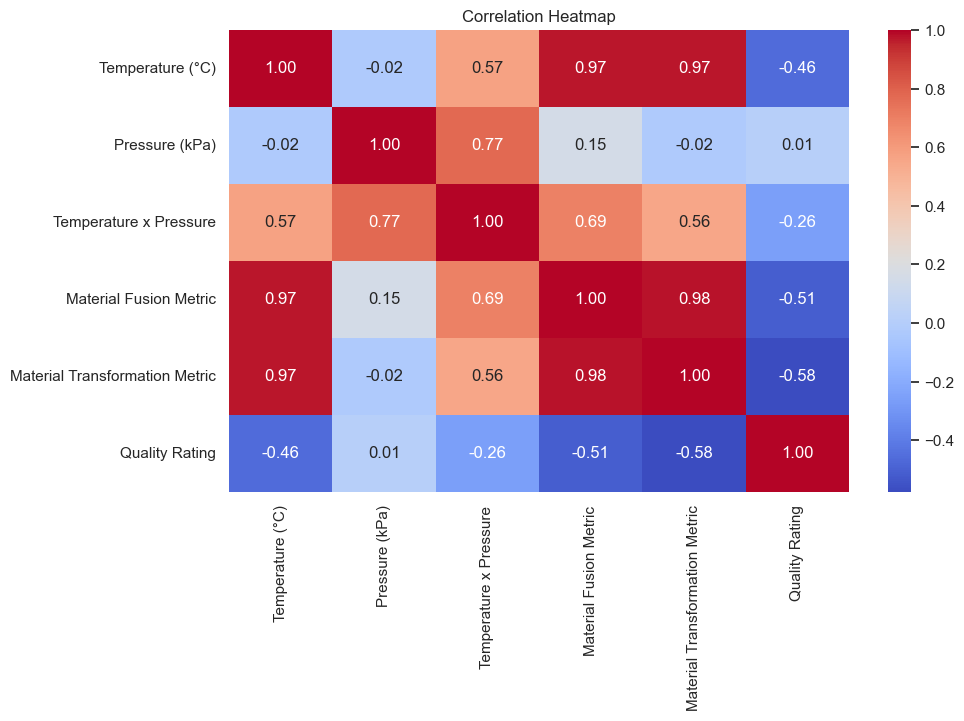

In [77]:
print(df.info())

print(df.describe())

print(df.isnull().sum())

sns.pairplot(df)

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

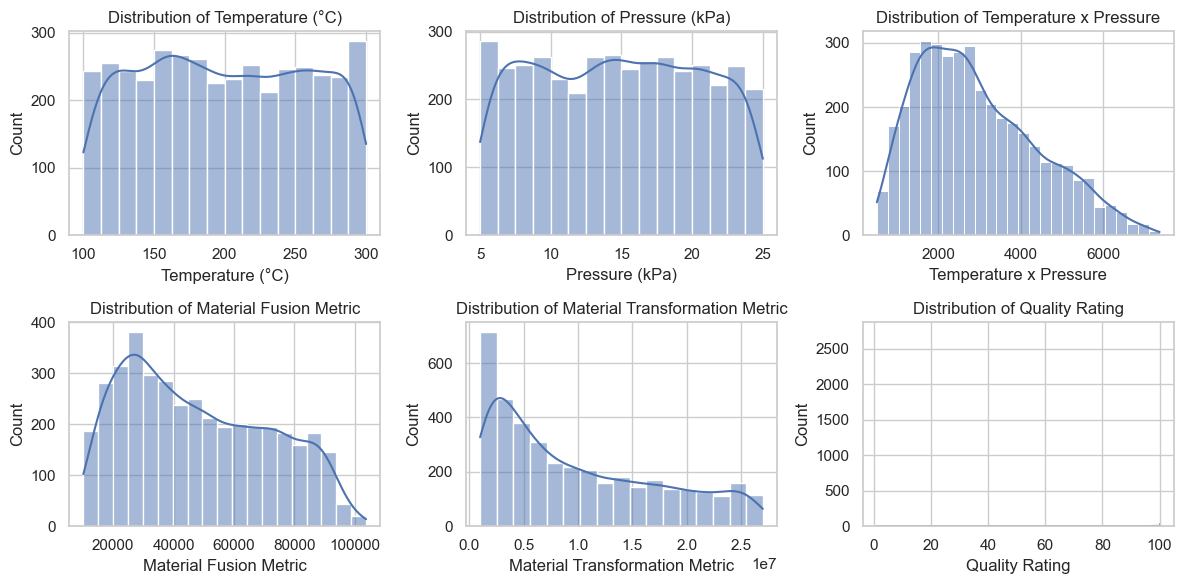

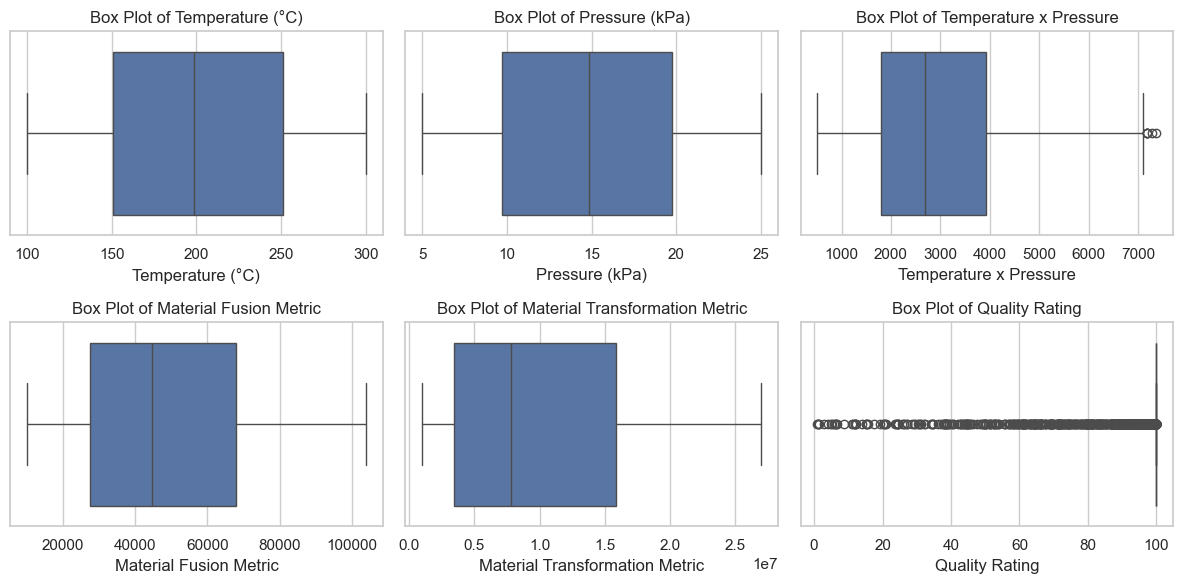

In [78]:
plt.figure(figsize=(12, 6))

numerical_columns = df.columns

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [79]:
X = df.drop('Quality Rating', axis = 1)
y = df['Quality Rating']

# y = y.to_numpy().reshape((-1,1))
# y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

best_degrees = {}
mse_values = {}

for col in X.columns:
    best_degree = 1
    best_mse = float('inf')
    degrees = list(range(1,30))
    mse_list = []

    for degree in degrees:

        poly = PolynomialFeatures(degree=degree)
        
        X_train_poly = poly.fit_transform(X_train[[col]])
        X_test_poly = poly.fit_transform(X_test[[col]])
        

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_pred = model.predict(X_test_poly)

        mse = mean_squared_error(y_test, y_pred)

        mse_list.append(mse)

        if mse < best_mse:
            best_mse = mse
            best_degree = degree

    best_degrees[col] = best_degree
    mse_values[col] = mse_list


In [80]:
for column, degree in best_degrees.items():
    print(f"The best polynomial degree for {column} is \033[91m{degree}\033[0m. ")     
    print("\n")

The best polynomial degree for Temperature (°C) is 29. 


The best polynomial degree for Pressure (kPa) is 3. 


The best polynomial degree for Temperature x Pressure is 9. 


The best polynomial degree for Material Fusion Metric is 5. 


The best polynomial degree for Material Transformation Metric is 14. 




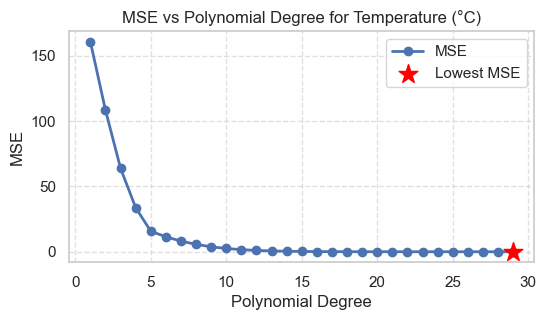

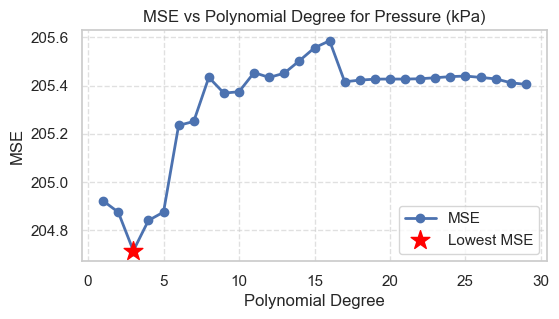

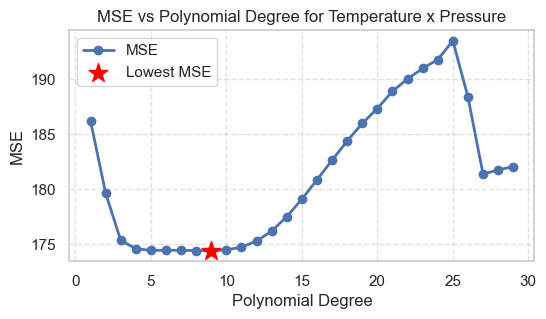

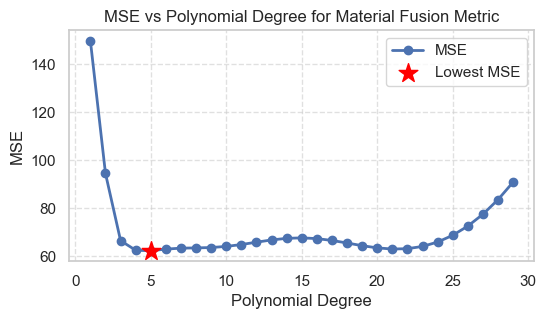

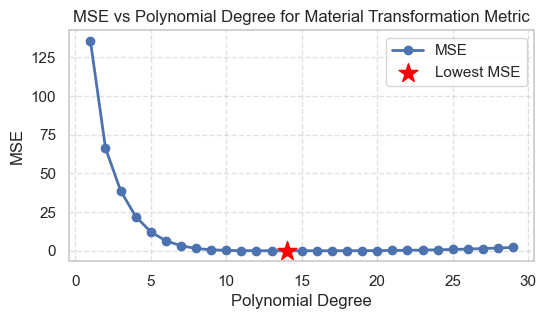

In [81]:
for col in X.columns:
    degrees = list(range(1,30))
    mse_list = mse_values[col]

    plt.figure(figsize=(6,3))

    plt.plot(degrees , mse_list, marker='o', linewidth=2, label='MSE')

    lowest_mse_i = np.argmin(mse_list)
    lowest_mse_degree = degrees[lowest_mse_i]
    lowest_mse = mse_list[lowest_mse_i]

    plt.scatter(lowest_mse_degree, lowest_mse, color = 'red', zorder=3, marker='*',
                s=200, label='Lowest MSE')
    
    plt.title(f'MSE vs Polynomial Degree for {col}')
    plt.xlabel("Polynomial Degree")
    plt.ylabel("MSE")

    plt.grid(True, linestyle='--',alpha=0.6)
    plt.legend()

    plt.show()


In [82]:
df_train = pd.concat([y_train, X_train], axis=1, sort=True)
Temperature_train = df_train["Temperature (°C)"].values.reshape(-1,1)
Pressure_train = df_train["Pressure (kPa)"].values.reshape(-1,1)
TempPress_train = df_train["Temperature x Pressure"].values.reshape(-1,1)
Fusion_train = df_train["Material Fusion Metric"].values.reshape(-1,1)
Transformation_train = df_train["Material Transformation Metric"].values.reshape(-1,1)

In [83]:
df_test = pd.concat([y_test, X_test], axis=1, sort=True)
Temperature_test = df_test["Temperature (°C)"].values.reshape(-1, 1)
Pressure_test = df_test["Pressure (kPa)"].values.reshape(-1, 1)
TempPress_test = df_test["Temperature x Pressure"].values.reshape(-1, 1)
Fusion_test = df_test["Material Fusion Metric"].values.reshape(-1, 1)
Transformation_test = df_test["Material Transformation Metric"].values.reshape(-1, 1)

In [84]:
poly_features = PolynomialFeatures(degree =  12) 
Temperature_train = poly_features.fit_transform(Temperature_train)
Temperature_test  = poly_features.fit_transform(Temperature_test)

poly_features = PolynomialFeatures(degree =  best_degrees["Pressure (kPa)"])
Pressure_train = poly_features.fit_transform(Pressure_train)
Pressure_test  = poly_features.fit_transform(Pressure_test)

poly_features = PolynomialFeatures(degree = 5)
TempPress_train = poly_features.fit_transform(TempPress_train)
TempPress_test  = poly_features.fit_transform(TempPress_test)

poly_features = PolynomialFeatures(degree  = 5)
Fusion_train = poly_features.fit_transform(Fusion_train)
Fusion_test  = poly_features.fit_transform(Fusion_test)

poly_features = PolynomialFeatures(degree  = 10)
Transformation_train = poly_features.fit_transform(Transformation_train)
Transformation_test  = poly_features.fit_transform(Transformation_test)

In [85]:
X_train1 = np.concatenate((Temperature_train,Pressure_train,TempPress_train,Fusion_train,Transformation_train),axis =1)
X_test1 = np.concatenate((Temperature_test, Pressure_test, TempPress_test, Fusion_test, Transformation_test), axis=1)

In [86]:
X_train["int1"] = X_train["Pressure (kPa)"].mul(X_train["Temperature (°C)"])
X_train["int2"] = X_train["Temperature x Pressure"].mul(X_train["Temperature (°C)"])
X_train["int3"] = X_train["Material Fusion Metric"].mul(X_train["Temperature (°C)"])
X_train["int4"] = X_train["Material Transformation Metric"].mul(X_train["Pressure (kPa)"])
X_train["int5"] = X_train["Temperature x Pressure"].mul(X_train["Pressure (kPa)"])
X_train["int6"] = X_train["Material Fusion Metric"].mul(X_train["Pressure (kPa)"])
X_train["int7"] = X_train["Material Transformation Metric"].mul(X_train["Temperature x Pressure"])
X_train["int8"] = X_train["Material Fusion Metric"].mul(X_train["Material Transformation Metric"])
X_train["int9"] = X_train["Pressure (kPa)"].mul(X_train["Material Fusion Metric"])
X_train["int10"] = X_train["Pressure (kPa)"].mul(X_train["Material Transformation Metric"])
X_train["int11"] = X_train["Temperature x Pressure"].mul(X_train["Material Fusion Metric"])
X_train["int12"] = X_train["Temperature x Pressure"].mul(X_train["Material Transformation Metric"])
X_train["int13"] = X_train["Material Fusion Metric"].mul(X_train["Material Fusion Metric"])
X_train["int14"] = X_train["Material Transformation Metric"].mul(X_train["Material Transformation Metric"])

In [87]:
X_test["int1"] = X_test["Pressure (kPa)"].mul(X_test["Temperature (°C)"])
X_test["int2"] = X_test["Temperature x Pressure"].mul(X_test["Temperature (°C)"])
X_test["int3"] = X_test["Material Fusion Metric"].mul(X_test["Temperature (°C)"])
X_test["int4"] = X_test["Material Transformation Metric"].mul(X_test["Pressure (kPa)"])
X_test["int5"] = X_test["Temperature x Pressure"].mul(X_test["Pressure (kPa)"])
X_test["int6"] = X_test["Material Fusion Metric"].mul(X_test["Pressure (kPa)"])
X_test["int7"] = X_test["Material Transformation Metric"].mul(X_test["Temperature x Pressure"])
X_test["int8"] = X_test["Material Fusion Metric"].mul(X_test["Material Transformation Metric"])
X_test["int9"] = X_test["Pressure (kPa)"].mul(X_test["Material Fusion Metric"])
X_test["int10"] = X_test["Pressure (kPa)"].mul(X_test["Material Transformation Metric"])
X_test["int11"] = X_test["Temperature x Pressure"].mul(X_test["Material Fusion Metric"])
X_test["int12"] = X_test["Temperature x Pressure"].mul(X_test["Material Transformation Metric"])
X_test["int13"] = X_test["Material Fusion Metric"].mul(X_test["Material Fusion Metric"])
X_test["int14"] = X_test["Material Transformation Metric"].mul(X_test["Material Transformation Metric"])

In [88]:
X_train2 = np.array(X_train[['int1','int2','int3','int4','int5','int6','int7','int8','int9','int10','int11','int12','int13','int14']])
X_test2 = np.array(X_test[['int1','int2','int3','int4','int5','int6','int7','int8','int9','int10','int11','int12','int13','int14']])

In [89]:
X_train1 = np.concatenate ((X_train1, X_train2), axis = 1)
X_test1 = np.concatenate ((X_test1, X_test2), axis = 1)

In [90]:
model = LinearRegression()
model.fit(X_train1, y_train)

LinearRegression()

In [91]:
score = model.score(X_test1, y_test)
print("R-squared score of the test:", score)

R-squared score of the test: -0.0016491787398942304


In [92]:
score = model.score(X_train1, y_train)
print("R-squared score of the test:", score)

R-squared score of the test: 0.0007980926119611764


In [93]:
rmse = []
degrees = np.arange(1,5)
min_rmse, min_degree = 1e10, 0

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    X_poly_test = poly_features.fit_transform(X_test)

    y_pred = model.predict(X_poly_test)

    mse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse.append(mse)

    if mse<min_rmse:
        min_rmse=mse
        min_degree=degree

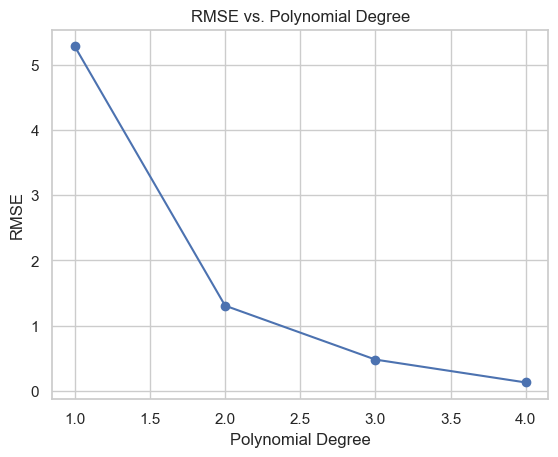

In [94]:
plt.plot(degrees, rmse, marker='o')
plt.title('RMSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

In [95]:
poly_degree = PolynomialFeatures(degree = 2)
X_train_pol = poly_degree.fit_transform(X_train)
X_test_pol = poly_degree.transform(X_test)

In [96]:
model = LinearRegression()
model.fit(X_train_pol, y_train)

y_pred_PR = model.predict(X_test_pol)
mse_PR = mean_squared_error(y_test, y_pred_PR)# Calculate the Mean Squared Error (MSE)
# Print the scores for Polynomial Regression
print(f"Polynomial Regression MSE: {mse_PR}")
print(f"Polynomial Regression Score on test: {model.score(X_test_pol, y_test)}")
print(f"Polynomial Regression Score on train: {model.score(X_train_pol, y_train)}")
print("\n")

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
mse_LR = mean_squared_error(y_test, y_pred_LR)# Calculate the Mean Squared Error (MSE)
# Print the scores for Linear Regression
print(f"Linear Regression MSE: {mse_LR}")
print(f"Linear Regression Score on test:{ LR.score(X_test, y_test)}")
print(f"Linear Regression Score on train:{ LR.score(X_train, y_train)}")

Polynomial Regression MSE: 1.7044381931546795
Polynomial Regression Score on test: 0.9916510745829499
Polynomial Regression Score on train: 0.9910112238640407


Linear Regression MSE: 27.805068757389517
Linear Regression Score on test:0.8638011949018043
Linear Regression Score on train:0.8606855945531664


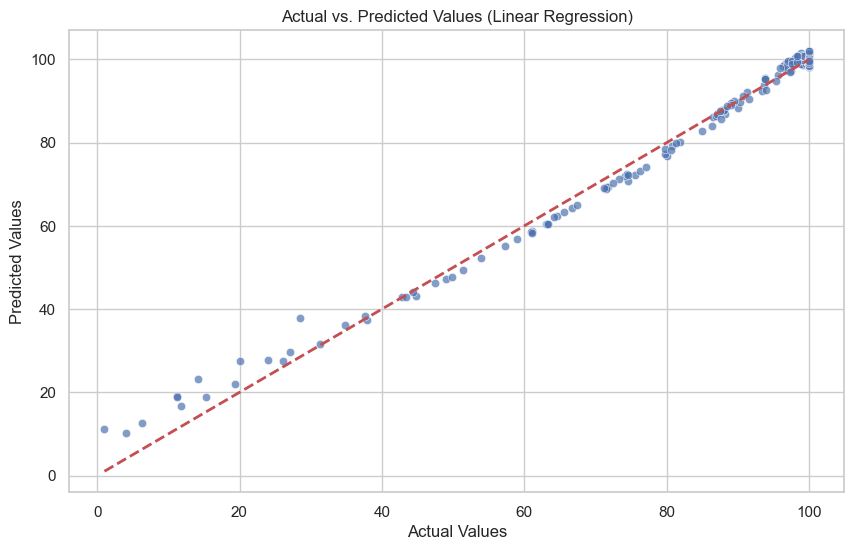

In [97]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(x=y_test, y=y_pred_PR, color='b', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.show()

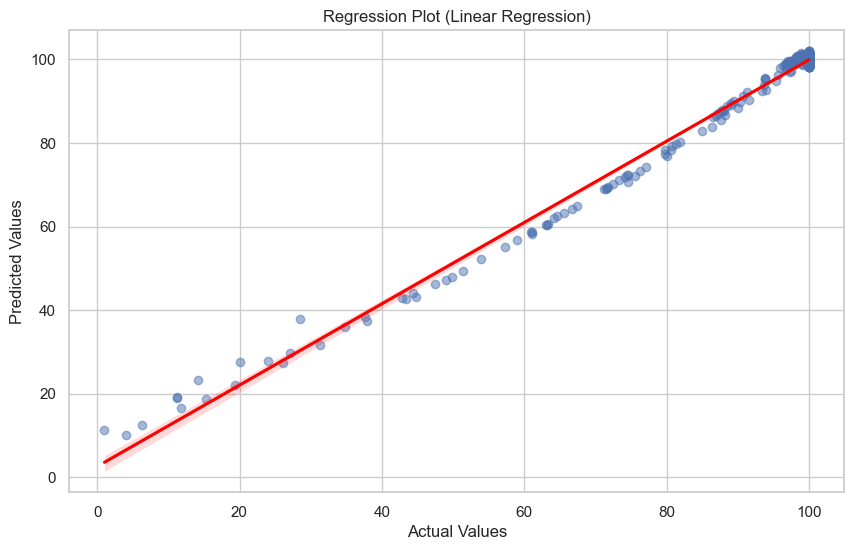

In [98]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.regplot(x=y_test, y=y_pred_PR, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot (Linear Regression)")
plt.show()

Text(0.5, 1.0, 'Residuals vs. Fitted Values')

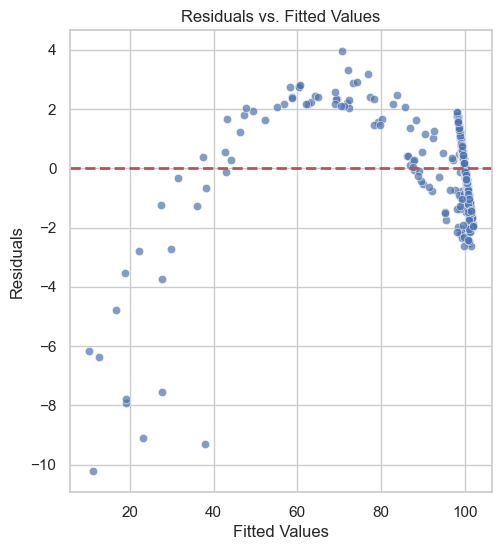

In [99]:
plt.figure(figsize=(12, 6))
# Residuals vs. Fitted Values
plt.subplot(1, 2, 1)
sns.set(style="whitegrid")
sns.scatterplot(x=y_pred_PR, y=y_test-y_pred_PR, color='b', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")

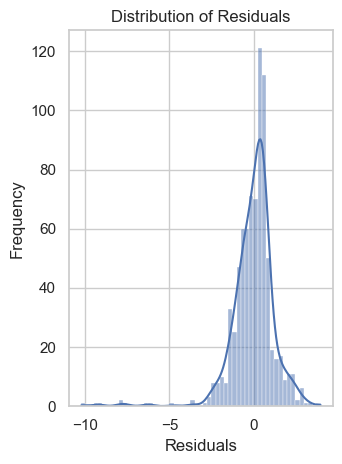

In [100]:
plt.subplot(1, 2, 2)
sns.set(style="whitegrid")
sns.histplot(y_test - y_pred_PR, kde=True, color='b')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.tight_layout()
plt.show()

In [101]:
print(f"Mean Squared Error (MSE): {mse_PR:.2f}")

Mean Squared Error (MSE): 1.70
